In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', 
                 parse_dates = ['Date'])
df['Total Covid Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)



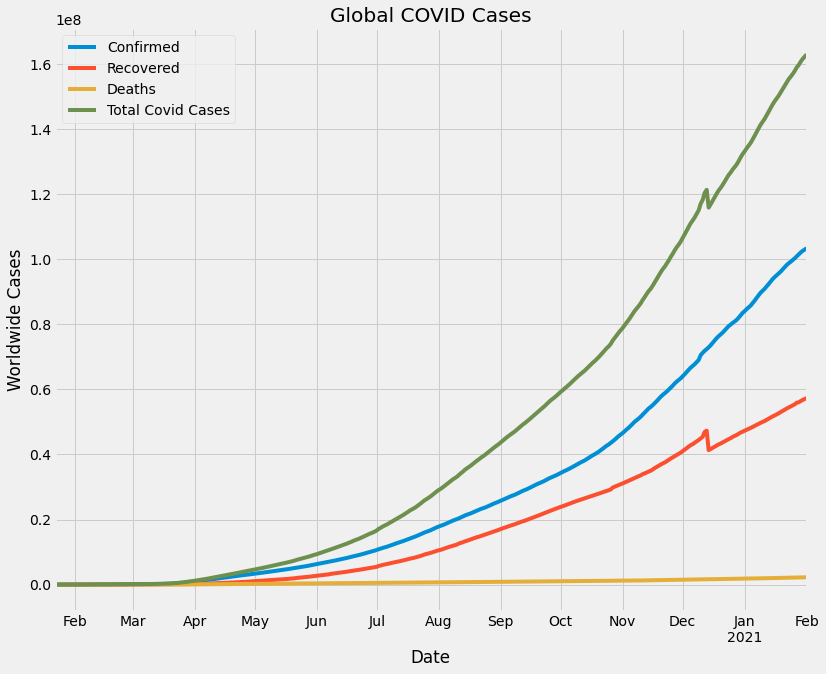

In [14]:
#Worldwide Cases

worldwide_df = df.groupby(['Date']).sum()
chart = worldwide_df.plot(figsize=(12,10))
chart.set_xlabel('Date')
chart.set_ylabel('Worldwide Cases')
chart.title.set_text('Global COVID Cases')

plt.show()

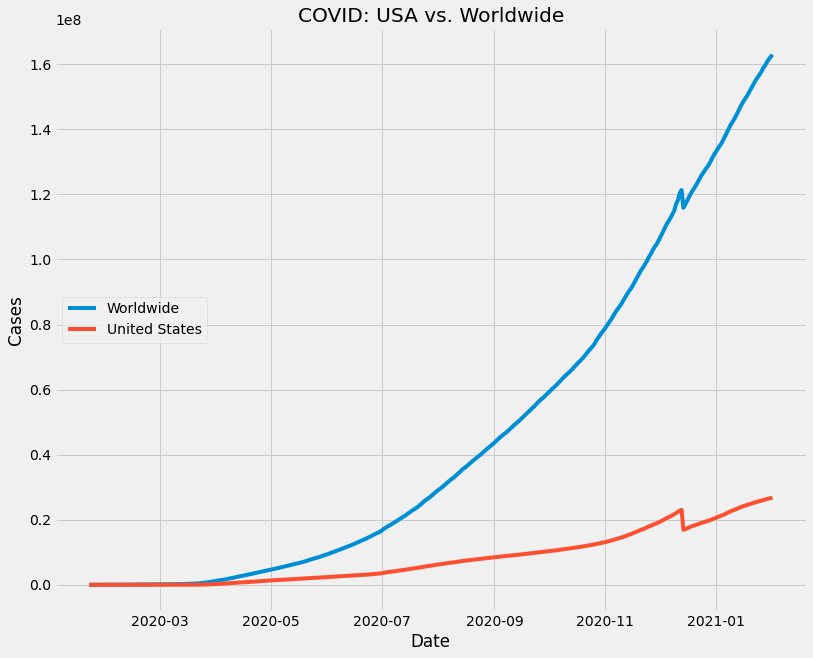

In [26]:
us_df = df[df['Country'] == 'US'].groupby(['Date']).sum()

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Covid Cases']], label='Worldwide')
ax.plot(us_df[['Total Covid Cases']], label = 'United States')
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.title.set_text('COVID: USA vs. Worldwide')

plt.legend(loc = 'center left')
plt.show()



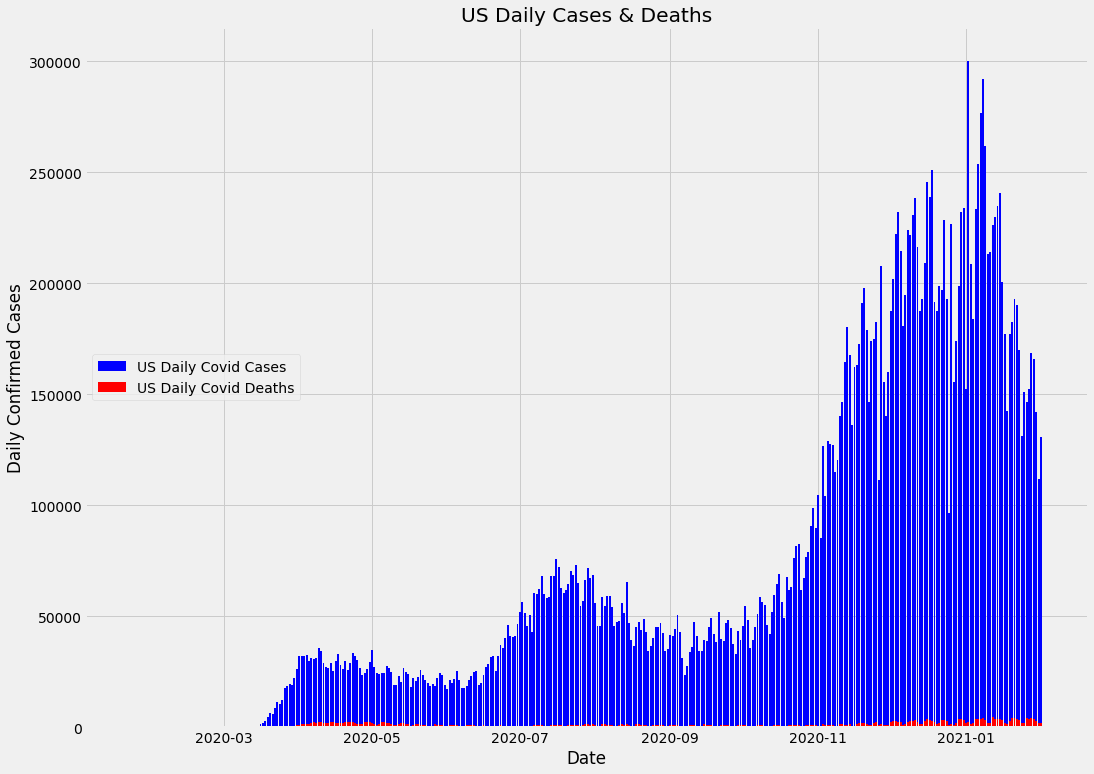

In [30]:
#Daily US Cases


us_df = us_df.reset_index()
us_df['Daily Confirmed Cases'] = us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df['Daily Deaths'] = us_df['Deaths'].sub(us_df['Deaths'].shift())
us_df

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)

ax.bar(us_df['Date'], us_df['Daily Confirmed Cases'], color = 'b', label = 'US Daily Covid Cases')
ax.bar(us_df['Date'], us_df['Daily Deaths'], color = 'r', label = 'US Daily Covid Deaths')

ax.set_xlabel('Date')
ax.set_ylabel('Daily Confirmed Cases')
ax.title.set_text("US Daily Cases & Deaths")

plt.legend(loc='center left')
plt.show()

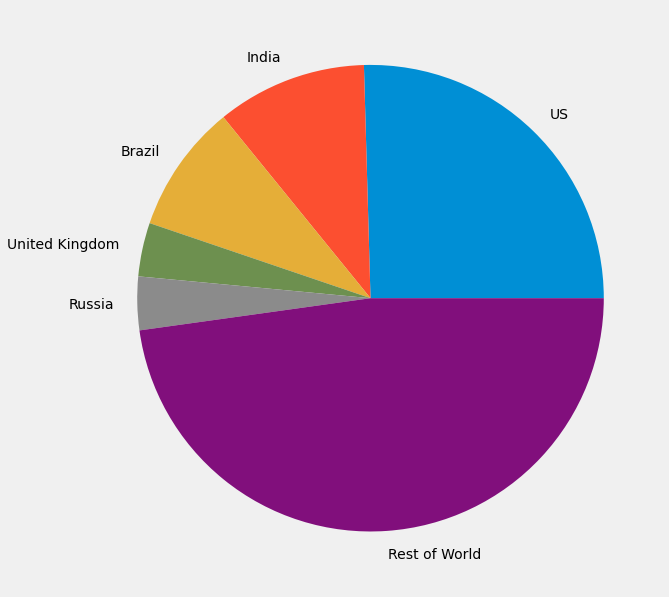

In [83]:
from datetime import date, timedelta

#todayDate = pd.Timestamp(date.today())
yesterday = date.today() - timedelta(days=1)
yesterday = pd.Timestamp(yesterday)
yesterday.strftime('%Y-%m-%d')


today_df = df[df['Date'] == yesterday]
top_5 = (today_df).sort_values(['Confirmed'], ascending = False)[:5]
top_5.loc['rest_of_world'] = today_df.sort_values(['Confirmed'], ascending = False)[5:].sum()
top_5.loc['rest_of_world', 'Country'] = 'Rest of World'

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.pie(top_5['Confirmed'], labels=top_5['Country'] )
plt.show()